In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#
files=["education_data.csv",
       "incentives.csv",
       "cars_by_state.csv",
       "income_data.csv",
       "new_by_age.csv",
       "state_abbreviations.csv",
       "state_party_counts.csv",
       "stations.csv",
       "tax_state.csv"]
dfs={}
for file in files:
    dfs[file]=pd.read_csv(f"../Resources/{file}")

# Vehicle type summary

In [80]:
summary_df=pd.merge(dfs["cars_by_state.csv"],dfs["state_abbreviations.csv"],how="inner",on="State")
summary_df=summary_df[["Year",
            "State",
            "Abbreviation",
            "Electric (EV)",
            "Plug-In Hybrid Electric (PHEV)",
            "Hybrid Electric (HEV)",
            "Gasoline",
            "Diesel"]]

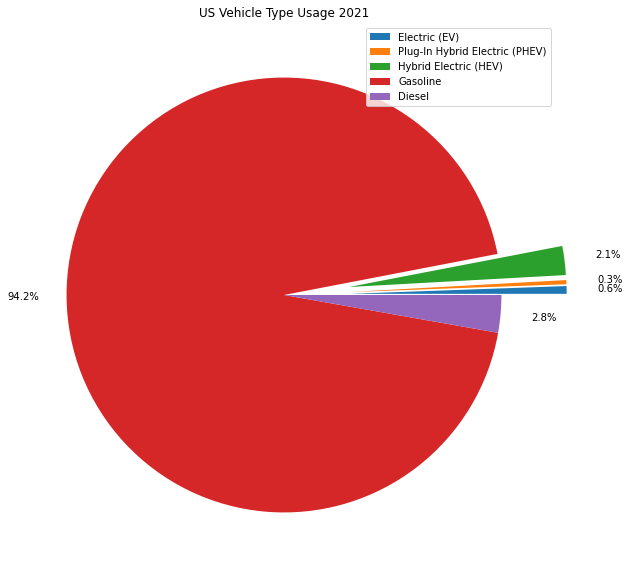

In [81]:
amounts=summary_df[summary_df["Year"]==2021][["Electric (EV)","Plug-In Hybrid Electric (PHEV)","Hybrid Electric (HEV)","Gasoline","Diesel"]].sum()
explode=(.3,.3,.3,0,0,)
plt.figure(figsize=(10,10))
plt.pie(amounts,explode=explode,autopct="%1.1f%%",pctdistance=1.2)
plt.legend(amounts.index)
plt.title("US Vehicle Type Usage 2021")
plt.show()

In [95]:
summary_df["Alternative total"]=summary_df["Electric (EV)"]+summary_df["Plug-In Hybrid Electric (PHEV)"]+summary_df["Hybrid Electric (HEV)"]
summary_df["Fuel total"]=summary_df["Gasoline"]+summary_df["Diesel"]
summary_df["Total vehicles"]=summary_df["Alternative total"]+summary_df["Fuel total"]
summary_df["Alternative Rate(%)"]=round(summary_df["Alternative total"]*100/summary_df["Total vehicles"],3)
reduced_df=summary_df[["Year","State","Abbreviation","Alternative total","Fuel total","Total vehicles","Alternative Rate(%)"]]
reduced_df=reduced_df.sort_values("Alternative Rate(%)", ascending=False)
reduced_df=reduced_df.reset_index(drop=True)

In [98]:
top_reduced_df=reduced_df[reduced_df["Year"]==2021].sort_values("Alternative Rate(%)", ascending=False)
top_reduced_df=top_reduced_df.reset_index(drop=True)
top_reduced_df.head()

,Year,State,Abbreviation,Alternative total,Fuel total,Total vehicles,Alternative Rate(%)
0,2021,District of Columbia,DC,22300,281000,303300,7.352
1,2021,California,CA,2234300,31223100,33457400,6.678
2,2021,Washington,WA,331100,6075600,6406700,5.168
3,2021,Oregon,OR,170400,3312500,3482900,4.892
4,2021,Hawaii,HI,47500,983900,1031400,4.605


In [99]:
bottom_reduced_df=reduced_df[reduced_df["Year"]==2021].sort_values("Alternative Rate(%)")
bottom_reduced_df=bottom_reduced_df.reset_index(drop=True)
bottom_reduced_df.head()

,Year,State,Abbreviation,Alternative total,Fuel total,Total vehicles,Alternative Rate(%)
0,2021,Mississippi,MS,21100,2365900,2387000,0.884
1,2021,Louisiana,LA,31200,3300200,3331400,0.937
2,2021,North Dakota,ND,6200,649800,656000,0.945
3,2021,Alabama,AL,50500,4174500,4225000,1.195
4,2021,Wyoming,WY,6600,544500,551100,1.198


# Population analysis

### Education analysis

In [90]:
ed_df=pd.DataFrame({"State":dfs["education_data.csv"]["State"],
                    "No Education":dfs["education_data.csv"]["No education"],
                    "High School":dfs["education_data.csv"]["High School"]+dfs["education_data.csv"]["GED or alternative"],
                    "Grad School":dfs["education_data.csv"]["associates"]+dfs["education_data.csv"]["Bachelors"],
                    "Post-grad School":dfs["education_data.csv"]["Masters"]+dfs["education_data.csv"]["Professional"]+dfs["education_data.csv"]["Doctorate"]
                   })
#                     "dfs["education_data.csv"]
ed_df
# education_df=pd.merge(reduced_df,dfs["education_data.csv"],how="inner",on="State")
# education_df

,State,No Education,High School,Grad School,Post-grad School
0,Alabama,43813.0,1041209.0,866927.0,346797.0
1,Alaska,3675.0,137873.0,134499.0,55500.0
2,Arizona,74688.0,1125498.0,1356343.0,572077.0
3,Arkansas,26523.0,688732.0,468202.0,177742.0
4,California,820953.0,5477154.0,7991248.0,3596055.0
5,Colorado,48362.0,810976.0,1383883.0,635146.0
6,Connecticut,33094.0,656949.0,756554.0,458399.0
7,Delaware,6240.0,209928.0,191104.0,98122.0
8,District of Columbia,6160.0,75562.0,138793.0,175184.0
9,Florida,248308.0,4282929.0,4582904.0,1801663.0


### Age analysis

### Income analysis

# Gas price analysis

### State Tax

### Historical gas prices

# Political analysis

### Political Party Preference

### Laws and incentives

### Station analysis

In [22]:
# Create stations by state out of list of stations
stationsbystate=dfs["stations.csv"].groupby("state").count()
stationsbystate=stationsbystate[["station_name"]]
stationsbystate=stationsbystate.rename(columns={"station_name":"Station count"})
stationsbystate

,Station count
state,
AK,60
AL,269
AR,228
AZ,987
CA,15113
CO,1830
CT,569
DC,291
DE,154
